Task 4 - Investigation of Natural Samples

In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import utils
import importlib
import json
from adjustText import adjust_text
importlib.reload(utils)
pd.set_option('display.max_rows', None)

In [2]:
#Define the file paths
file_path_autunite = r'Data\Task 4\autunite.TKA'
file_path_filter = r'Data\Task 4\filter dirt.TKA'
file_path_soil = r'Data\Task 4\soil.TKA'

file_paths = [file_path_autunite, file_path_filter, file_path_soil]

#file path for background data
file_path_background = r'Data\Task 3\background 8.0 uS.TKA'

In [3]:
#import the background data
background_df = {}

background_df, total_time_background = utils.load_data(file_path_background)
print('Background Data succesfully imported.')

#Create a dictionary for the object data
object_dict = {}
#Load the data
for file_path in file_paths:
    #Load the data from the file path
    data, total_time = utils.load_data(file_path)

    #Get the name of the element from the file path
    object_name = file_path.split('\\')[-1].split('.')[0].strip().capitalize()
    object_dict[object_name] = data
    
    #Create the Normalized Counts per Second with the background spectrum subtracted, and clip it so there are no negative numbers
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Normalized Counts per Second'].clip(lower=1e-6)
    # for i in range(0, len(object_dict[object_name])):
    #     print(f"Subracting {object_dict[object_name].loc[i, 'Counts per Second']} - {background_df.loc[i, 'Counts per Second']}")
    # Identify rows where clipping occurred
    clipped_rows = object_dict[object_name][
    (object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']) < 1e-6
]

    # Print the clipped rows
    if not clipped_rows.empty:
        print(f"Clipped entries for {object_name}:")
        print(clipped_rows)
        print(f'Data imported successfully for {object_name}.')

### For debugging ###
#print(object_dict)
#print(background_df)
#print(background_df.dtypes)
type(background_df)

Background Data succesfully imported.
Clipped entries for Autunite:
      Channel  Counts per Second  Counts  Normalized Counts per Second
0           1           0.000000       0                      0.000001
1           2           0.000000       0                      0.000001
2           3           0.000000       0                      0.000001
1093     1094           0.016667      10                      0.000001
1336     1337           0.010000       6                      0.000001
1607     1608           0.011667       7                      0.000001
1784     1785           0.033333      20                      0.000001
1800     1801           0.003333       2                      0.000001
1815     1816           0.010000       6                      0.000001
1884     1885           0.005000       3                      0.000001
1904     1905           0.005000       3                      0.000001
1959     1960           0.003333       2                      0.000001
1964     

pandas.core.frame.DataFrame

In [4]:
#Convert data to desired
#Channels > Energy (keV)
#Counts > Counts per Second
   
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

for object_name, data in object_dict.items():
    data['Energy (keV)'] = channel_to_energy(data['Channel'])

    ### For debugging ###
    print(f'Data for {object_name}')
    print(data.head())
    print('=' * 50)



Data for Autunite
   Channel  Counts per Second  Counts  Normalized Counts per Second  \
0        1           0.000000       0                      0.000001   
1        2           0.000000       0                      0.000001   
2        3           0.000000       0                      0.000001   
3        4           0.001667       1                      0.001111   
4        5           0.008333       5                      0.008333   

   Energy (keV)  
0      0.561216  
1      0.887758  
2      1.214301  
3      1.540843  
4      1.867386  
Data for Filter dirt
   Channel  Counts per Second  Counts  Normalized Counts per Second  \
0        1                0.0       0                      0.000001   
1        2                0.0       0                      0.000001   
2        3                0.0       0                      0.000001   
3        4                0.0       0                      0.000001   
4        5                0.0       0                      0.000001   


C:\Users\kearb\AppData\Local\Temp\ipykernel_38052\997719888.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


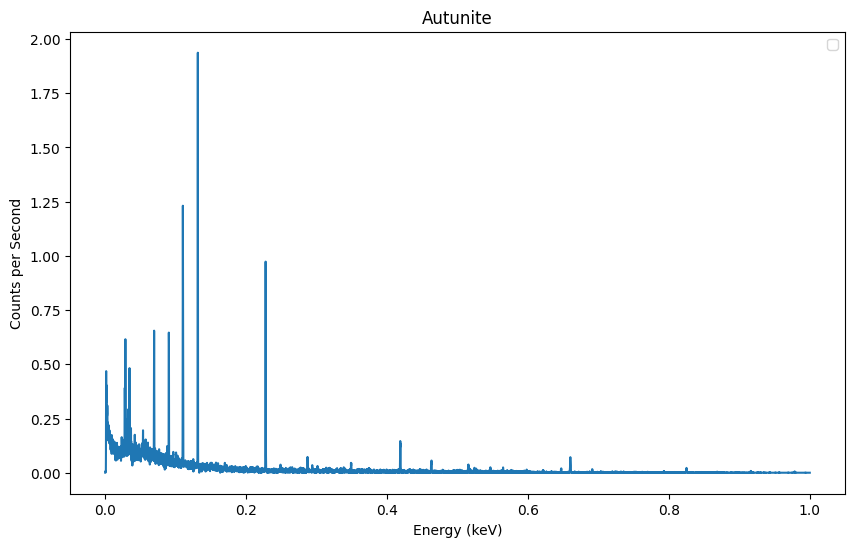

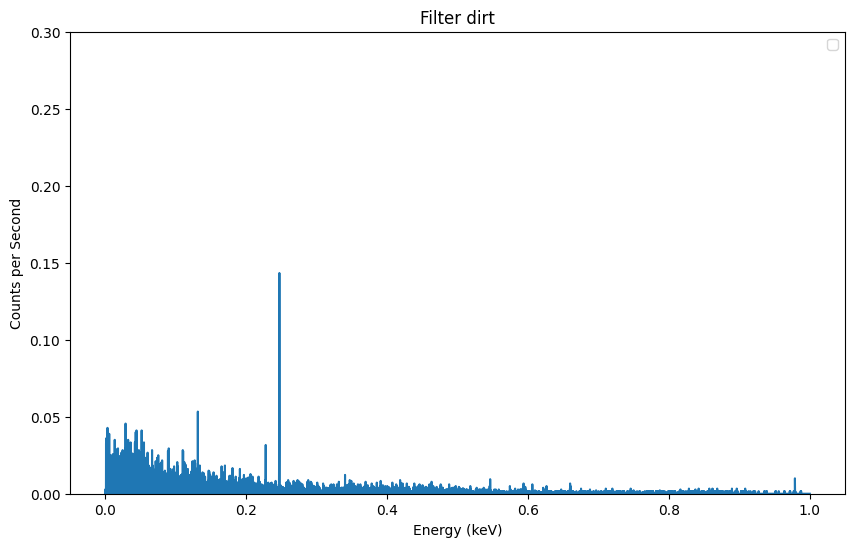

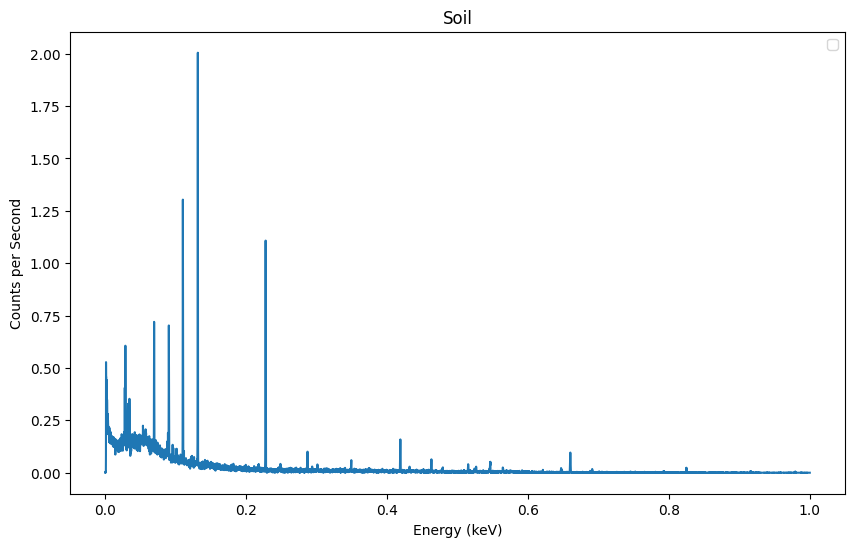

In [5]:
#Preliminary plots for visual data inspection
for object_name, data in object_dict.items():
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)']/data['Energy (keV)'].max(), data['Normalized Counts per Second'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()

In [6]:
#Load background data for superimposed plot
background_dict = {}

#Import the data for the background spectrum
file_path = r'Data\Task 3\background 8.0 uS.TKA'
background_dict, total_time = utils.load_data(file_path)

#Conversions for dataframe
#Channels > energy
#Counts > counts per second
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

background_dict['Energy (keV)'] = channel_to_energy(background_dict['Channel'])

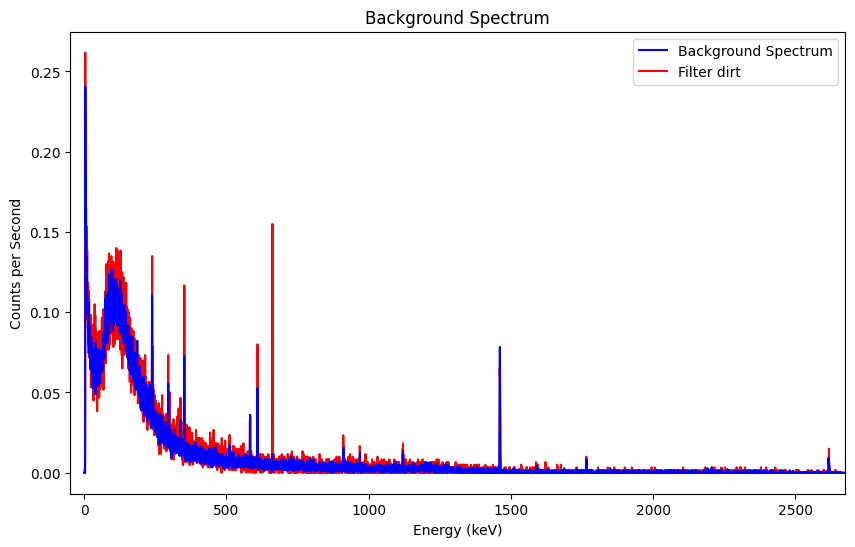

In [7]:
#Create a plot of the background spectrum and filter spectrum superimposed
plt.figure(figsize=(10, 6))
plt.plot(background_dict['Energy (keV)'], background_dict['Counts per Second'], label='Background Spectrum', color='blue', zorder=2)
plt.title('Background Spectrum')
plt.plot(object_dict['Filter dirt']['Energy (keV)'], object_dict['Filter dirt']['Counts per Second'], label='Filter dirt', color='red', zorder=1)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
#plt.ylim(bottom=0, top=2.0)
plt.legend()
#plt.grid()
plt.xlim(left=-50, right=background_dict['Energy (keV)'].max())

plt.show()

In [18]:
#Create the peaks_dict
peaks_dict = {}

#Call the peak_finder_simple function
for object_name, data in object_dict.items():
    peaks_dict = utils.find_peaks_simple(data=object_dict, start_channel=25, channel_step=50, cutoff_value = 0.1, threshold_factor=2)

#peaks_dict = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=5, channel_step=25, cutoff_value = 0.013, threshold_factor=2)


Data type: <class 'dict'>
Data keys: dict_keys(['Autunite', 'Filter dirt', 'Soil'])
No peak found for Autunite in channel range 25 to 75 (Max: 0.36, Avg:  0.5014 )
Updated to: 75 → 125
No peak found for Autunite in channel range 75 to 125 (Max: 0.24, Avg:  0.3568 )
Updated to: 125 → 175
No peak found for Autunite in channel range 125 to 175 (Max: 0.19166666666666668, Avg:  0.3121333333333334 )
Updated to: 175 → 225
No peak found for Autunite in channel range 175 to 225 (Max: 0.235, Avg:  0.35446666666666665 )
Updated to: 225 → 275
Peak found for Autunite at channel 235 with value 0.725 (Max: 0.725, Avg: 0.2779333333333333)
Updated to: 209 → 259

Duplicate peak found for Autunite at channel 235 with value 0.725 (Max: 0.725, Avg: 0.2544666666666667)
Updated to: 259 → 309

Peak found for Autunite at channel 283 with value 0.5966666666666667 (Max: 0.5966666666666667, Avg: 0.2588333333333333)
Updated to: 257 → 307

Duplicate peak found for Autunite at channel 283 with value 0.59666666666666

In [58]:
print(slice_dict.items())

dict_items([('Filter dirt',       Energy (keV)  Counts per Second
0         0.561216           0.000000
1         0.887758           0.000000
2         1.214301           0.000000
3         1.540843           0.000000
4         1.867386           0.000000
5         2.193928           0.003333
6         2.520471           0.001667
7         2.847013           0.003333
8         3.173556           0.016667
9         3.500098           0.261667
10        3.826641           0.206667
11        4.153183           0.216667
12        4.479726           0.180000
13        4.806268           0.210000
14        5.132811           0.185000
15        5.459353           0.168333
16        5.785896           0.175000
17        6.112438           0.161667
18        6.438981           0.165000
19        6.765523           0.140000
20        7.092066           0.121667
21        7.418608           0.148333
22        7.745151           0.121667
23        8.071694           0.146667
24        8.398236    

In [65]:
#To find the rogue Filter dirt peak, because I'm running out of patience

# Slice the 'Filter dirt' DataFrame for the specified energy range
filter_dirt_data = object_dict['Filter dirt']
energy_slice = filter_dirt_data[(filter_dirt_data['Energy (keV)'] >= 600) & (filter_dirt_data['Energy (keV)'] <= 650)]

# Find the row with the maximum 'Counts per Second'
max_row = energy_slice.loc[energy_slice['Counts per Second'].idxmax()]
max_counts_per_second = max_row['Counts per Second']
# Get the corresponding energy value
max_energy = max_row['Energy (keV)']

print(f"The energy value corresponding to the maximum count is: {max_energy} keV\n The CpS value is {max_counts_per_second}")

The energy value corresponding to the maximum count is: 609.2364451099328 keV
 The CpS value is 0.08


C:\Users\kearb\AppData\Local\Temp\ipykernel_38052\3441860001.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


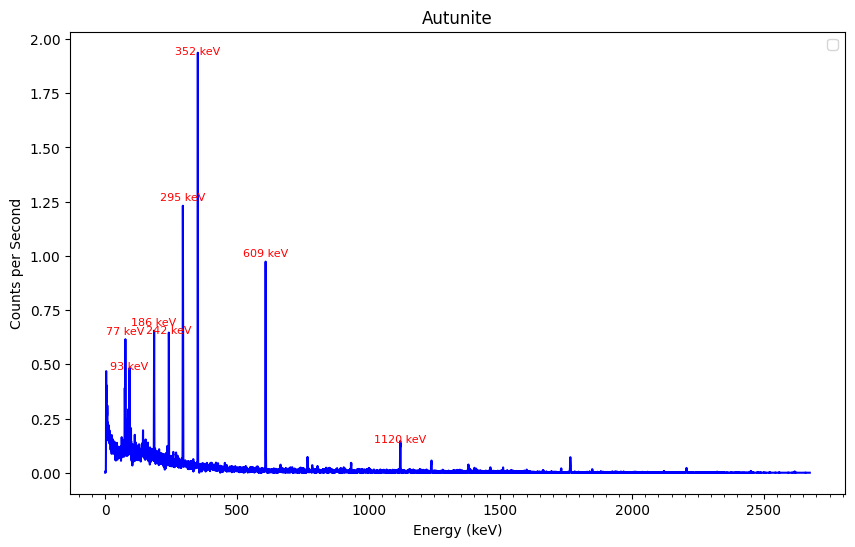

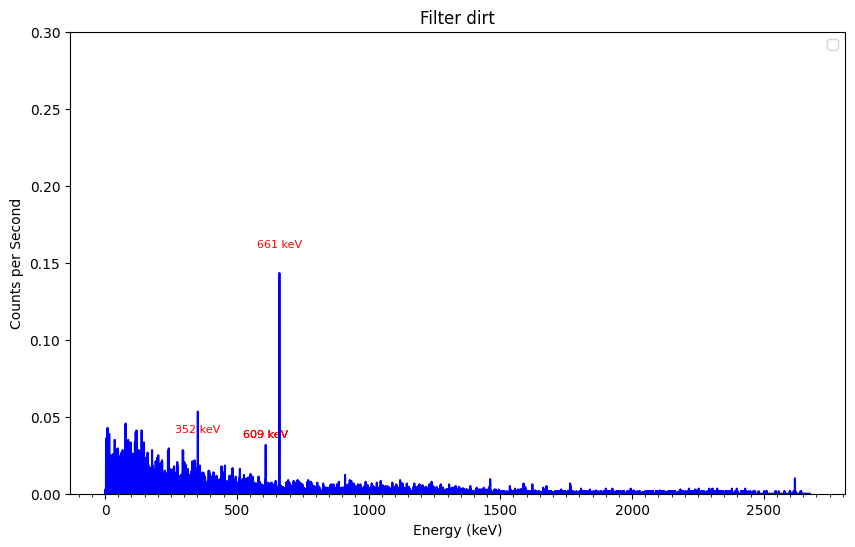

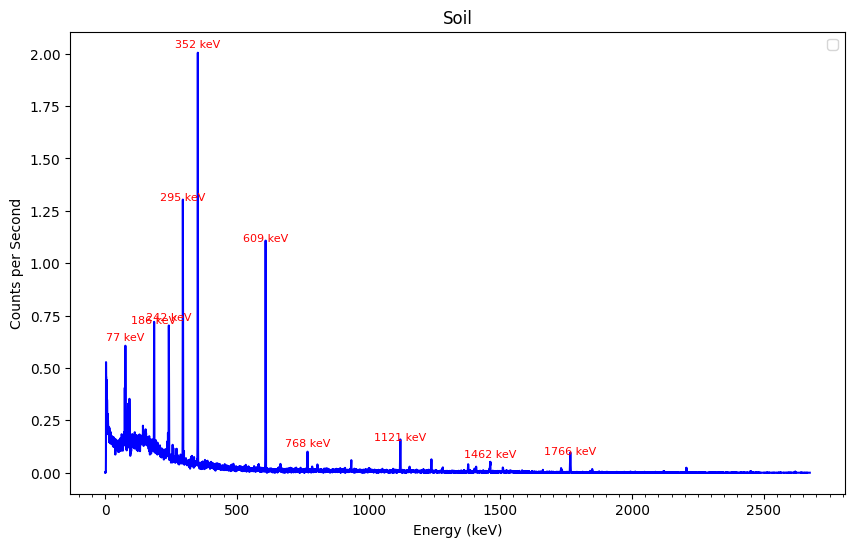

In [84]:
#Replot the data with the peaks

rogue_x = int(609)
rogue_y = float(0.035)

for object_name, data in object_dict.items():
    #First, extract the peak data
    peak_energies = peaks_dict[object_name]['Energy (keV)'].to_numpy()
    peak_counts = peaks_dict[object_name]['Normalized Counts per Second'].to_numpy()

    #convert peak channel to peak_energy

    #Create the plots
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)'], data['Normalized Counts per Second'], color='blue')
    for i, (x, y) in enumerate(zip(peak_energies, peak_counts)):
        if y > 0.05:  # Only label significant peaks
            x_rounded = round(x, 0)
            offset = 0.015 if i % 2 == 0 else -0.015  # Alternate label positions
            plt.text(x, y + offset, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
    # for x, y in zip(peak_energies, peak_counts):
    #     x_rounded = round(x, 0)
    #     if x_rounded == 186:
    #         plt.text(x, y+.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='top', color='red', zorder=1)    
    #     else:
    #         if x_rounded == 242:
    #             plt.text(x, y-0.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    #         else:
    #             plt.text(x, y+.005, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
        if object_name == 'Filter dirt':
            plt.text(rogue_x, rogue_y, f'{rogue_x} keV', fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(50))
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()


In [10]:
print(type(peaks_dict))
print(type(peaks_dict['Autunite']))

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
print(peaks_dict.keys())
print(peaks_dict['Soil'])

dict_keys(['Autunite', 'Filter dirt', 'Soil'])
      Channel  Counts per Second  Counts  Normalized Counts per Second  \
234     235.0           0.715556   644.0                      0.606111   
568     569.0           0.793333   714.0                      0.720000   
739     740.0           0.753333   678.0                      0.702778   
901     902.0           0.963333   867.0                      0.921667   
902     903.0           1.358889  1223.0                      1.303333   
1076   1077.0           2.067778  1861.0                      2.004444   
1863   1864.0           1.122222  1010.0                      1.069444   
1864   1865.0           1.157778  1042.0                      1.107778   
2351   2352.0           0.107778    97.0                      0.100556   
3430   3431.0           0.172222   155.0                      0.158889   
4474   4475.0           0.114444   103.0                      0.050556   
5405   5406.0           0.102222    92.0                      0.0

In [12]:
print(peaks_dict)

{'Autunite':       Channel  Counts per Second  Counts  Normalized Counts per Second  \
227     228.0           0.500000   300.0                      0.391111   
234     235.0           0.725000   435.0                      0.615556   
282     283.0           0.596667   358.0                      0.482222   
568     569.0           0.728333   437.0                      0.655000   
739     740.0           0.696667   418.0                      0.646111   
901     902.0           0.930000   558.0                      0.888333   
902     903.0           1.286667   772.0                      1.231111   
1076   1077.0           2.000000  1200.0                      1.936667   
1863   1864.0           0.986667   592.0                      0.933889   
1864   1865.0           1.023333   614.0                      0.973333   
3429   3430.0           0.155000    93.0                      0.146111   

      Energy (keV)  
227      74.686365  
234      76.972162  
282      92.646202  
568     186.03

In [13]:
for element_name, peaks in peaks_dict.items():
    print(f"Peaks for {element_name}:")
    print(peaks)
    print("=" * 50)

Peaks for Autunite:
      Channel  Counts per Second  Counts  Normalized Counts per Second  \
227     228.0           0.500000   300.0                      0.391111   
234     235.0           0.725000   435.0                      0.615556   
282     283.0           0.596667   358.0                      0.482222   
568     569.0           0.728333   437.0                      0.655000   
739     740.0           0.696667   418.0                      0.646111   
901     902.0           0.930000   558.0                      0.888333   
902     903.0           1.286667   772.0                      1.231111   
1076   1077.0           2.000000  1200.0                      1.936667   
1863   1864.0           0.986667   592.0                      0.933889   
1864   1865.0           1.023333   614.0                      0.973333   
3429   3430.0           0.155000    93.0                      0.146111   

      Energy (keV)  
227      74.686365  
234      76.972162  
282      92.646202  
568    

In [44]:
print(slope)

0.3265425049472979
